In [127]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K

In [128]:
data = pd.read_csv('risk_scores_data.csv')
data.head()

,cholesterol,diabetes,family_history,hypertension,physical_inactivity,risk_score
0,-2,-2,-2,-2,-2,0.017986
1,-2,-1,-2,-2,-2,0.029312
2,-2,0,-2,-2,-2,0.047426
3,-2,1,-2,-2,-2,0.075858
4,-2,2,-2,-2,-2,0.119203


In [129]:
# Extract features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [130]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self, num_features, **kwargs):
        super(CustomActivation, self).__init__(**kwargs)
        self.w = self.add_weight(shape=(num_features,), initializer='ones', trainable=True)

    def call(self, inputs):
        weighted_sum = K.sum(inputs * self.w, axis=-1)
        divided_sum = weighted_sum / 8.0
        return K.sigmoid(divided_sum)

In [132]:
custom_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation=CustomActivation(X_train.shape[1]))  # Output layer with linear activation for regression
])

sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with linear activation for regression
])

linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

In [133]:
# Compile the model
custom_sigmoid_model.compile(optimizer='adam', loss='mean_squared_error')
sigmoid_model.compile(optimizer='adam', loss='mean_squared_error')
linear_model.compile(optimizer='adam', loss='mean_squared_error')


In [134]:
# Train the model
custom_sigmoid_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
sigmoid_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
linear_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [204]:
linear_loss = linear_model.evaluate(X_test, y_test, verbose=0)
print(f"\x1b[31mMean Squared Error of Linear on Test Set: {linear_loss:.2e}\x1b[0m", end='\n\n')

sigmoid_loss = sigmoid_model.evaluate(X_test, y_test, verbose=0)
print(f"\x1b[32mMean Squared Error of Sigmoid on Test Set: {sigmoid_loss:.2e}\x1b[0m", end='\n\n')

custom_sigmoid_loss = custom_sigmoid_model.evaluate(X_test, y_test, verbose=0)
print(f"\x1b[34mMean Squared Error of Custom Sigmoid on Test Set: {custom_sigmoid_loss:.2e}")

Mean Squared Error of Linear on Test Set: 4.07e-04

Mean Squared Error of Sigmoid on Test Set: 2.43e-05

Mean Squared Error of Custom Sigmoid on Test Set: 1.54e-05


In [168]:
custom_sigmoid_prediction = custom_sigmoid_model.predict(X_test, verbose=0)
sigmoid_prediction = sigmoid_model.predict(X_test, verbose=0)
linear_prediction = linear_model.predict(X_test, verbose=0)

test = pd.DataFrame(X_test, columns=data.columns[:-1])
test['Custom Sigmoid Prediction'] = custom_sigmoid_prediction
test['Sigmoid Prediction'] = sigmoid_prediction
test['Linear Prediction'] = linear_prediction
test['Actual'] = y_test
test.head()

,cholesterol,diabetes,family_history,hypertension,physical_inactivity,Custom Sigmoid Prediction,Sigmoid Prediction,Linear Prediction,Actual
0,1,0,0,-1,-1,0.371496,0.382142,0.373728,0.377541
1,-1,2,1,-1,1,0.678646,0.674000,0.665424,0.679179
2,2,-1,1,0,-2,0.430682,0.430909,0.441197,0.437823
3,1,-2,-2,2,0,0.472584,0.468658,0.484538,0.468791
4,2,-1,0,1,-1,0.592386,0.592868,0.603780,0.592667


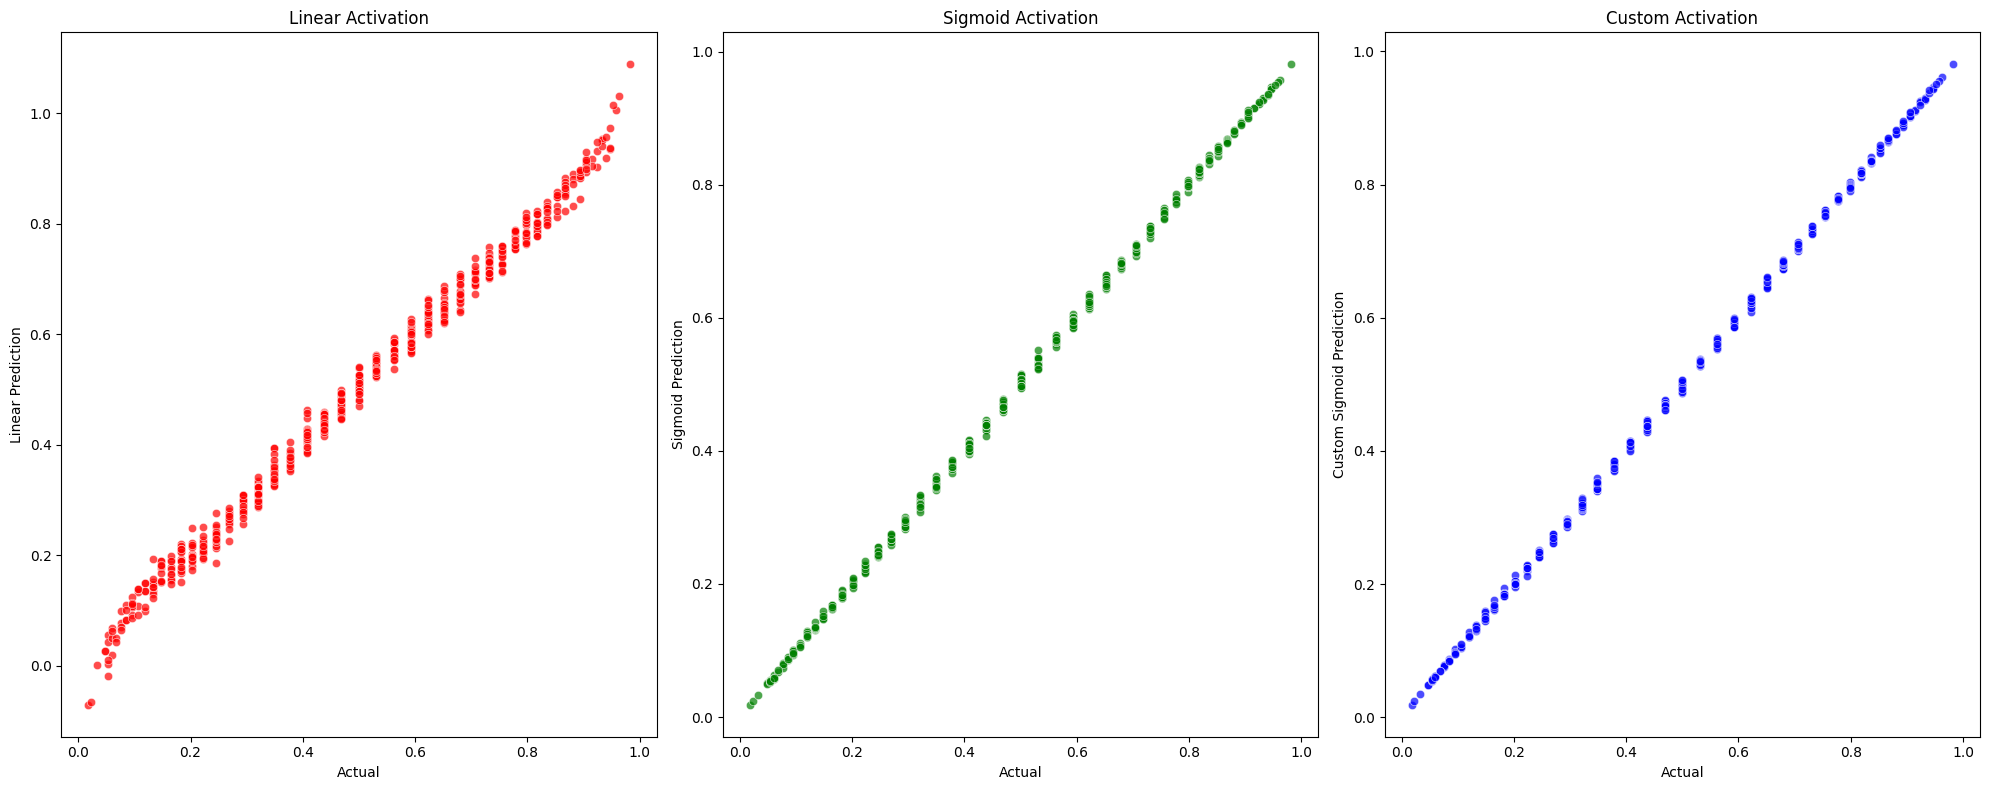

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Actual', y='Linear Prediction', data=test, alpha=0.7, color='red')
plt.title('Linear Activation')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Actual', y='Sigmoid Prediction', data=test, alpha=0.7, color='green')
plt.title('Sigmoid Activation')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Actual', y='Custom Sigmoid Prediction', data=test, alpha=0.7, color='blue')
plt.title('Custom Activation')

plt.tight_layout()
plt.show()

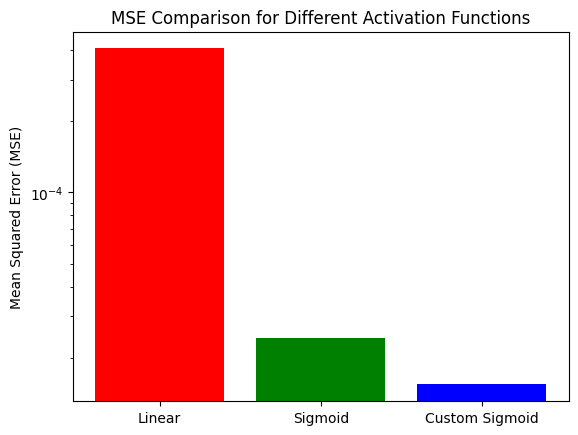

In [212]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Linear', 'Sigmoid', 'Custom Sigmoid']
mse_values = [linear_loss, sigmoid_loss, custom_sigmoid_loss]

plt.bar(models, mse_values, color=['red', 'green', 'blue'])
plt.yscale('log')  # Use logarithmic scale for better visualization if values have a wide range
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Different Activation Functions')
plt.show()
